- [x] Please provide additional comments and notes in markup cells to explain the code for clustering and anomaly detection.  
- [x] Please expand the clustering part by doing multiple plots showing the effect of different values of k range 2 to 5.
- [x] Include Elbow Method plot after the silhouette score.   
Reference: [k-mean-getting-the-optimal-number-of-clusters](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)  
- [x] Optional: For the anomaly detection portion, add an additional code cell to show how to remove the top 10 outliers instead of 5.

In [10]:
# Libraries are already imported below, no need to import again.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


In [11]:
# Load the Iris dataset
dataset = load_iris()  # Do NOT unpack, just assign directly

# Display the dataset description
print("feature names:", dataset.feature_names) # type: ignore
print("target names:", dataset.target_names)
print("data shape:", dataset.data.shape) # type: ignore

# X contains the feature data from the Iris dataset.
# It is a numpy array of shape (150, 4), where each row is a sample and each column is a feature.
X = dataset.data

# Basic data exploration
print("\nDataset Statistics:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature ranges:")
for i, feature_name in enumerate(dataset.feature_names):
    print(f"  {feature_name}: {X[:, i].min():.2f} - {X[:, i].max():.2f}")

# Check for missing values
print(f"\nMissing values: {np.isnan(X).sum()}")

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']
data shape: (150, 4)

Dataset Statistics:
Number of samples: 150
Number of features: 4
Feature ranges:
  sepal length (cm): 4.30 - 7.90
  sepal width (cm): 2.00 - 4.40
  petal length (cm): 1.00 - 6.90
  petal width (cm): 0.10 - 2.50

Missing values: 0


## Data Preprocessing Considerations

**Feature Scaling**: Notice that the features have different ranges (e.g., sepal length: 4.30-7.90 vs sepal width: 2.00-4.40). 
While K-means can work with unscaled data, standardization often improves clustering performance by ensuring all features contribute equally to distance calculations.

For this tutorial, we'll proceed with the original data to maintain comparability with the known Iris species classification.

# K-means Clustering

KMeans(n_clusters=3, random_state=42)


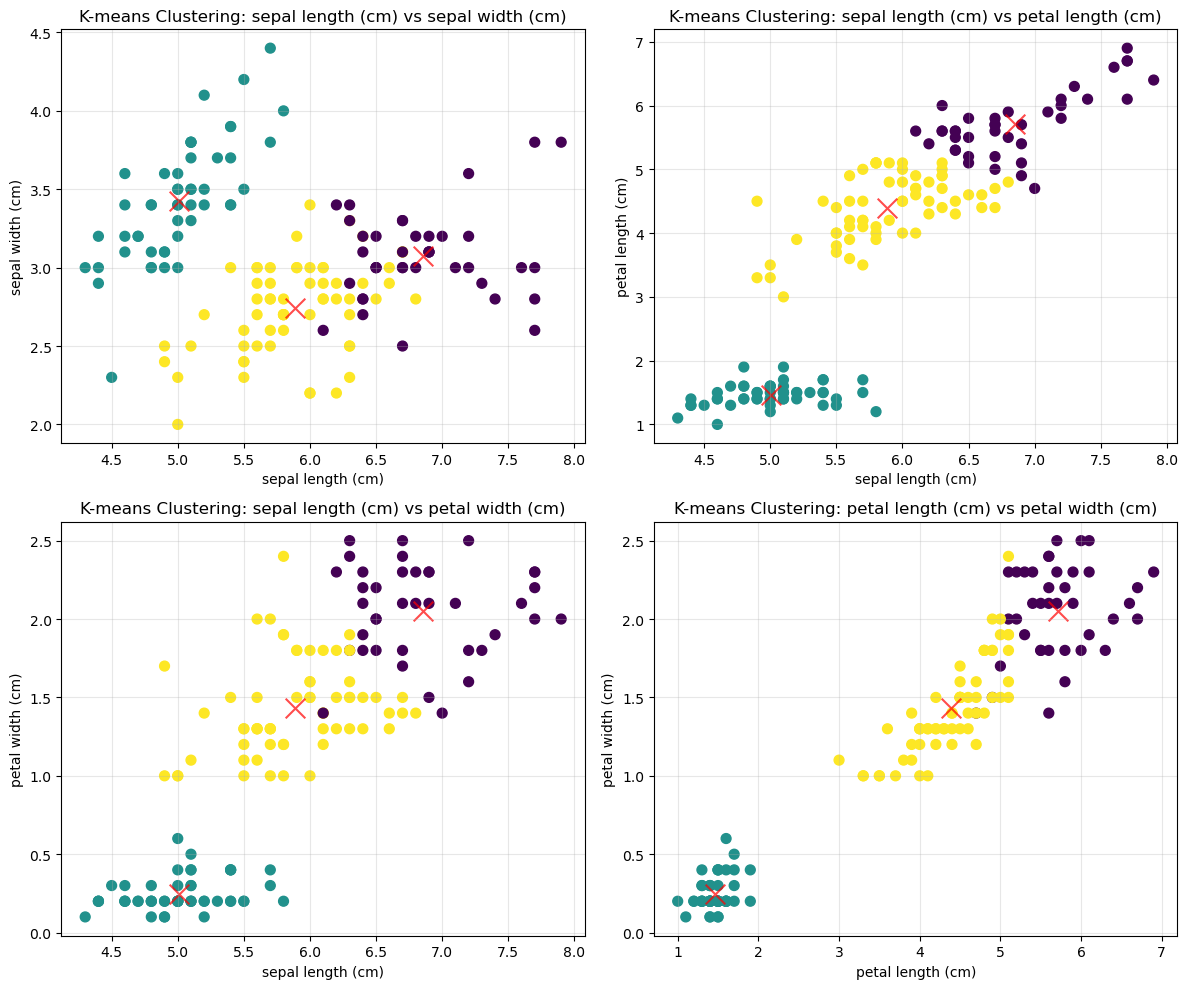

In [12]:
# fit a Kmeans model to the data
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)
print(model)

# Visualize the results using different feature combinations
y_kmeans = model.predict(X)

# Create subplots for different feature combinations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
feature_pairs = [(0, 1), (0, 2), (0, 3), (2, 3)]
feature_names = dataset.feature_names

for idx, (i, j) in enumerate(feature_pairs):
    row, col = idx // 2, idx % 2
    
    # Scatter plot the selected features
    axes[row, col].scatter(X[:, i], X[:, j], c=y_kmeans, s=50, cmap='viridis')
    # show centroid centres as grey circle opacity 50%
    centers = model.cluster_centers_
    axes[row, col].scatter(centers[:, i], centers[:, j], c='red', s=200, alpha=0.7, marker='x')
    axes[row, col].set_title(f'K-means Clustering: {feature_names[i]} vs {feature_names[j]}')
    axes[row, col].set_xlabel(feature_names[i])
    axes[row, col].set_ylabel(feature_names[j])
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

## Finding the best number of clusters

**KMeans Inertia/Distortions and Silhouette Score**

**Inertia** in KMeans clustering refers to the sum of squared distances between each data point and its assigned cluster center. It serves as a measure of how internally coherent the clusters are. Lower inertia indicates more compact clusters, which is generally desirable. However, inertia will always decrease as the number of clusters increases, so it should be interpreted cautiously and often used with the "elbow method" to determine an optimal number of clusters.

**Distortion** is another term often used interchangeably with inertia. It also measures the average of the squared distances from each point to its assigned cluster center. In practice, both terms describe the same concept in the context of KMeans: how well the clusters fit the data. Like inertia, lower distortion means tighter clusters, but too many clusters can artificially lower distortion without providing meaningful groupings.

**Silhouette Score** evaluates how well each data point fits within its assigned cluster compared to other clusters. Ranging from -1 to 1, higher values indicate better-defined and well-separated clusters. Unlike inertia, the silhouette score does not always increase with more clusters, making it especially useful for determining the optimal number of clusters and assessing clustering quality.

These two metrics complement each other and are commonly used together to evaluate and select the best KMeans clustering solution.


Silhouette Score Analysis:
----------------------------------------
k= 2: Silhouette Score = 0.6810
k= 3: Silhouette Score = 0.5512
k= 4: Silhouette Score = 0.4976
k= 5: Silhouette Score = 0.4931
k= 6: Silhouette Score = 0.3678
k= 7: Silhouette Score = 0.3543
k= 8: Silhouette Score = 0.3447
k= 9: Silhouette Score = 0.3156
k=10: Silhouette Score = 0.3014

Optimal k based on Silhouette Score: 2 (Score: 0.6810)


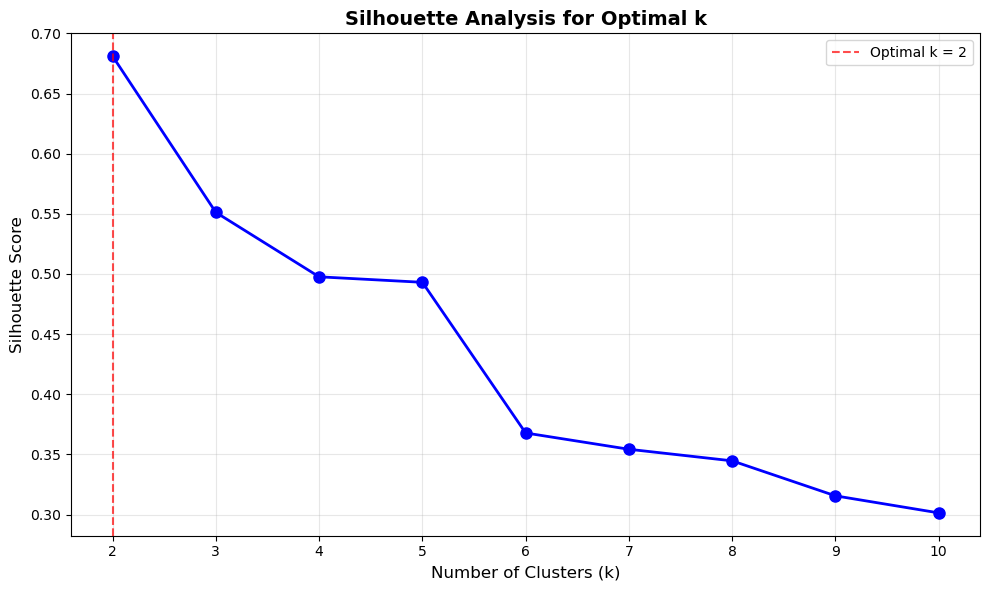

In [13]:
# Calculate silhouette scores for different k values
silhouette_scores = []
k_silhouette_mapping = {}

print("Silhouette Score Analysis:")
print("-" * 40)

for k in range(2, 11):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels, metric="euclidean")
    
    # Store results
    silhouette_scores.append(silhouette_avg)
    k_silhouette_mapping[k] = silhouette_avg
    
    print(f"k={k:2d}: Silhouette Score = {silhouette_avg:.4f}")

# Find optimal k based on silhouette score
optimal_k = max(k_silhouette_mapping, key=k_silhouette_mapping.get)
print(f"\nOptimal k based on Silhouette Score: {optimal_k} (Score: {k_silhouette_mapping[optimal_k]:.4f})")

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.title('Silhouette Analysis for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(2, 11))

# Highlight optimal k
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, 
            label=f'Optimal k = {optimal_k}')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

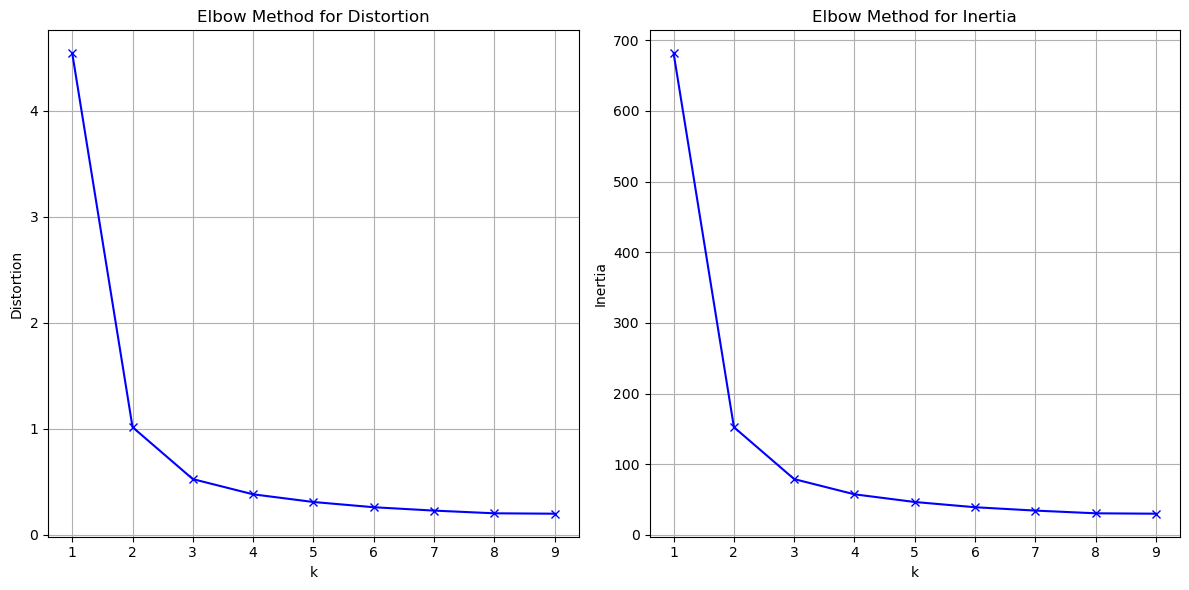

Distortion values:
1 : 4.542470666666664
2 : 1.01565301173572
3 : 0.5257044388398484
4 : 0.3823392014196983
5 : 0.3098148677248678
6 : 0.2604402356902358
7 : 0.22870543530543538
8 : 0.2031748196248197
9 : 0.19937497772758653

Inertia values:
1 : 681.3706
2 : 152.3479517603579
3 : 78.8556658259773
4 : 57.35088021295475
5 : 46.472230158730156
6 : 39.066035353535355
7 : 34.3058152958153
8 : 30.476222943722945
9 : 29.906246659137967


In [5]:
# Using Elbow method to choose n_cluster

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

# Plotting the elbow curve for distortions and inertias
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for Distortion')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Inertia')
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

print()
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

## Optimal Cluster Analysis Summary

Based on the three evaluation methods:

1. **Silhouette Score**: Higher values indicate better-defined clusters
2. **Elbow Method (Distortion)**: Look for the "elbow" point where the rate of decrease slows
3. **Elbow Method (Inertia)**: Similar to distortion, find the point of diminishing returns

**Recommendation**: For the Iris dataset, **k=3** appears to be optimal based on:
- Known ground truth (3 species of iris)
- Good silhouette score
- Clear elbow point in both distortion and inertia plots

## Visualizing K-means Clustering Results for Different Values of k (2 to 5)

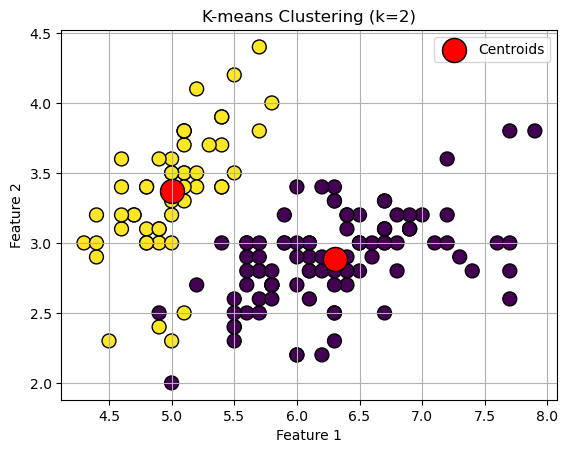

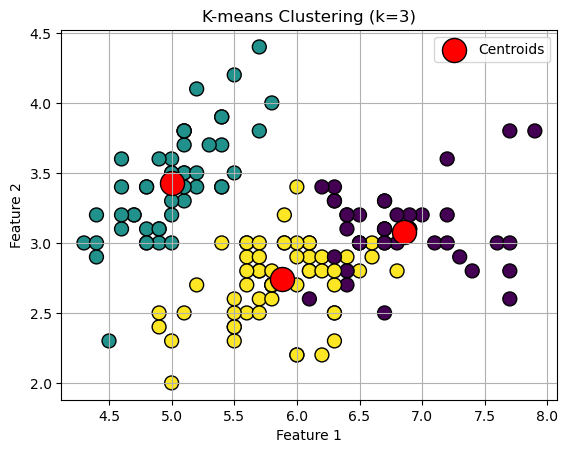

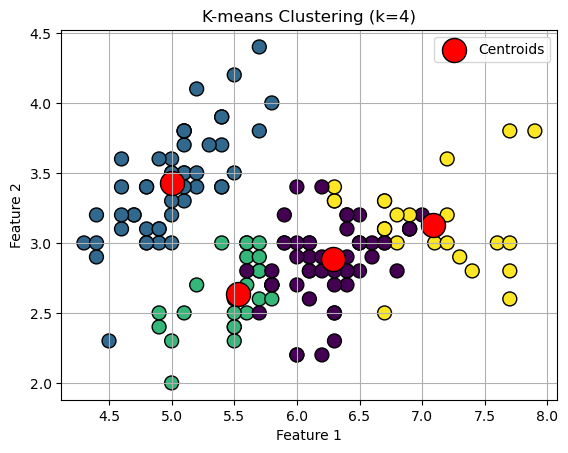

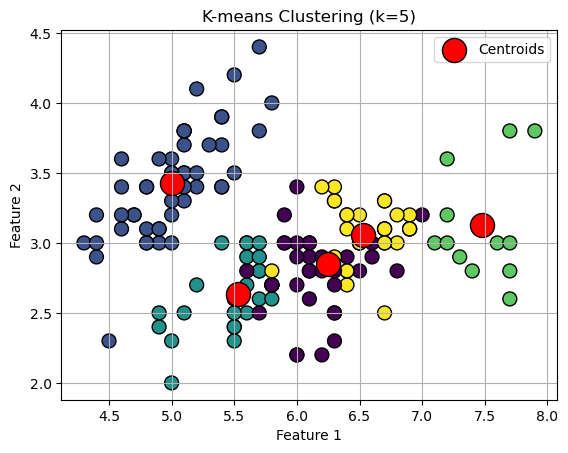

In [ ]:
k_range = range(2, 5+1)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()

# Anomaly Detection using k-means

In [ ]:
def plot_kmeans_clusters(X, kmeans, title: str = "K-means Clustering"):
    """
    Plot K-means clustering results with centroids.
    
    Args:
        X (np.ndarray): Feature matrix of shape (n_samples, n_features)
        kmeans (KMeans): Fitted K-means model
        title (str, optional): Plot title. Defaults to "K-means Clustering".
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Plot data points
    y_kmeans = kmeans.predict(X)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis", alpha=0.7, label='Data Points')
    
    # Plot centroids
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8, 
               marker='x', linewidths=3, label='Centroids')
    
    # Set labels and limits
    ax.set_xlabel("Sepal Length (cm)", fontsize=12)
    ax.set_ylabel("Sepal Width (cm)", fontsize=12)
    ax.set_xlim(4, 8)
    ax.set_ylim(2, 4.5)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    plt.close()


def detect_anomalies(X, kmeans, n_anomalies=5) -> tuple:
    """
    Detect anomalies based on distance to the closest centroid.
    
    Args:
        X (np.ndarray): Feature matrix of shape (n_samples, n_features)
        kmeans (KMeans): Fitted K-means model
        n_anomalies (int, optional): Number of anomalies to detect. Defaults to 5.
    
    Returns:
        tuple: (anomaly_indices, X_without_anomalies, anomaly_data, distances)
        
    Raises:
        ValueError: If n_anomalies is greater than the number of samples
    """
    if n_anomalies > X.shape[0]:
        raise ValueError(f"n_anomalies ({n_anomalies}) cannot be greater than number of samples ({X.shape[0]})")
    
    # Compute distances to the closest centroid for each point
    distances = kmeans.transform(X).min(axis=1)
    
    # Get the indices of points with the largest distances
    anomaly_indices = np.argsort(distances)[::-1][:n_anomalies]
    
    # Extract data without anomalies
    X_without_anomalies = np.delete(X, anomaly_indices, axis=0)
    
    # Extract anomaly data
    anomaly_data = X[anomaly_indices, :]
    
    # Print statistics
    print(f"Anomaly Detection Statistics:")
    print(f"Total samples: {X.shape[0]}")
    print(f"Anomalies detected: {n_anomalies}")
    print(f"Mean distance to centroid: {distances.mean():.3f}")
    print(f"Std distance to centroid: {distances.std():.3f}")
    print(f"Max anomaly distance: {distances[anomaly_indices[0]]:.3f}")
    print(f"Min anomaly distance: {distances[anomaly_indices[-1]]:.3f}")
    
    return anomaly_indices, X_without_anomalies, anomaly_data, distances

**Top 5 Anomalies with 3 clusters**

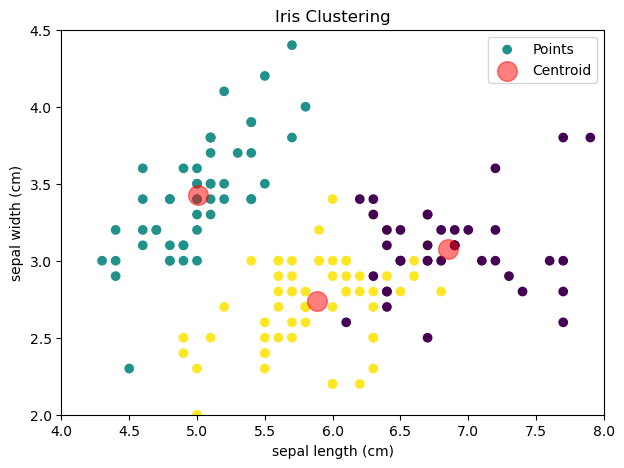

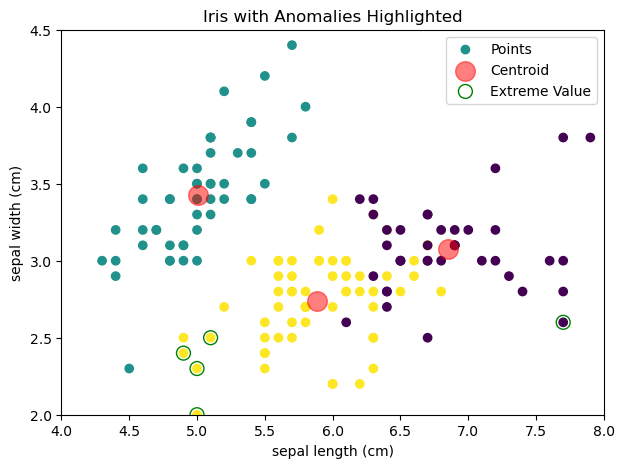

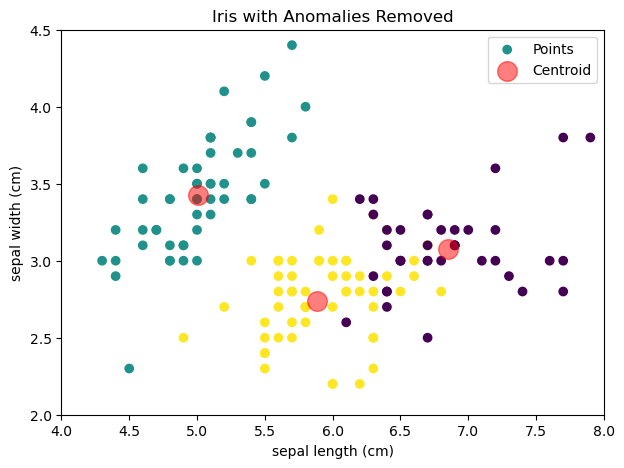

Anomalies detected:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               2.5                3.0               1.1
1                4.9               2.4                3.3               1.0
2                7.7               2.6                6.9               2.3
3                5.0               2.3                3.3               1.0
4                5.0               2.0                3.5               1.0


In [ ]:
# n_clusters = 3 and anomaly = 5

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
anomaly = 5

# Plot initial clusters
plot_kmeans_clusters(X, kmeans, title="Iris Clustering (3 clusters)")

# Detect anomalies
anomaly_indices, X_without_anomalies, anomaly_data, distances = detect_anomalies(X, kmeans, n_anomalies=anomaly)

# Plot with anomalies highlighted
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Iris Dataset with Top 5 Anomalies Highlighted", fontsize=14, fontweight='bold')
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis", alpha=0.7, label='Normal Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8, 
           marker='x', linewidths=3, label='Centroids')
ax.scatter(X[anomaly_indices][:, 0], X[anomaly_indices][:, 1],
           label='Anomalies', edgecolors='orange', facecolors='none', 
           s=150, linewidths=3)
ax.legend(loc='best')
ax.set_xlabel("Sepal Length (cm)", fontsize=12)
ax.set_ylabel("Sepal Width (cm)", fontsize=12)
ax.set_xlim(4, 8)
ax.set_ylim(2, 4.5)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

# Plot with anomalies removed
plot_kmeans_clusters(X_without_anomalies, kmeans, title="Iris Dataset with Top 5 Anomalies Removed")

# Create and display anomaly DataFrame with distances
anomaly_df = pd.DataFrame(anomaly_data, columns=dataset.feature_names)
anomaly_df['Distance_to_Centroid'] = distances[anomaly_indices]
anomaly_df['Sample_Index'] = anomaly_indices
print("\nTop 5 Anomalies detected:")
print(anomaly_df.round(3))

**Top 10 anomalies with 3 clusters**

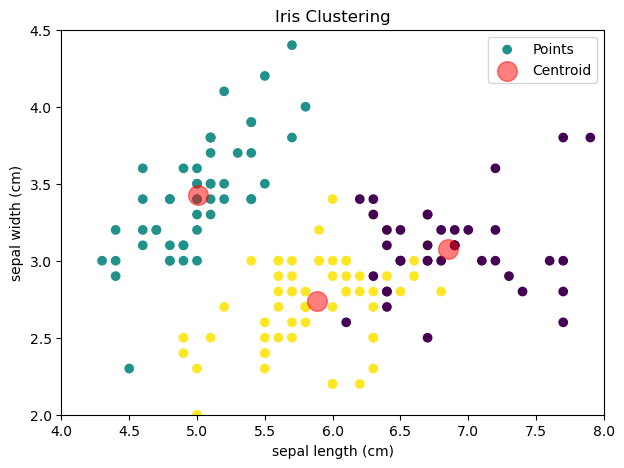

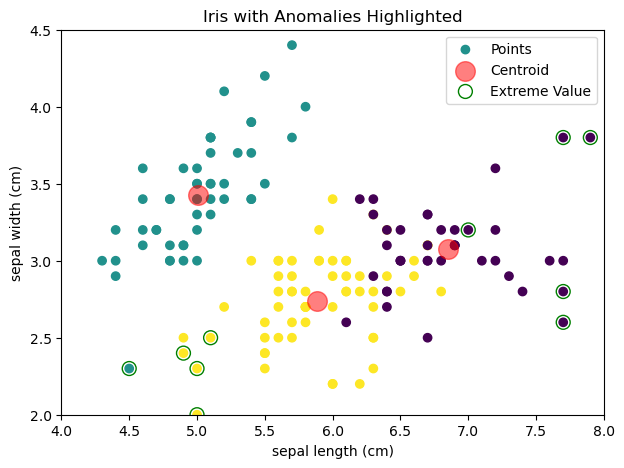

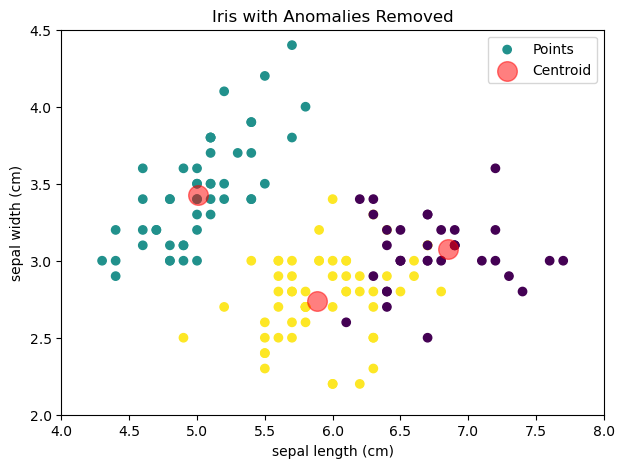

Anomalies detected:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               2.5                3.0               1.1
1                4.9               2.4                3.3               1.0
2                7.7               2.6                6.9               2.3
3                5.0               2.3                3.3               1.0
4                5.0               2.0                3.5               1.0
5                7.7               3.8                6.7               2.2
6                7.9               3.8                6.4               2.0
7                7.7               2.8                6.7               2.0
8                4.5               2.3                1.3               0.3
9                7.0               3.2                4.7               1.4


In [ ]:
# n_clusters = 3 and anomaly = 10

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
anomaly = 10

# Plot initial clusters
plot_kmeans_clusters(X, kmeans, title="Iris Clustering (3 clusters)")

# Detect anomalies
anomaly_indices, X_without_anomalies, anomaly_data, distances = detect_anomalies(X, kmeans, n_anomalies=anomaly)

# Plot with anomalies highlighted
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Iris Dataset with Top 10 Anomalies Highlighted", fontsize=14, fontweight='bold')
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis", alpha=0.7, label='Normal Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8, 
           marker='x', linewidths=3, label='Centroids')
ax.scatter(X[anomaly_indices][:, 0], X[anomaly_indices][:, 1],
           label='Anomalies', edgecolors='orange', facecolors='none', 
           s=150, linewidths=3)
ax.legend(loc='best')
ax.set_xlabel("Sepal Length (cm)", fontsize=12)
ax.set_ylabel("Sepal Width (cm)", fontsize=12)
ax.set_xlim(4, 8)
ax.set_ylim(2, 4.5)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

# Plot with anomalies removed
plot_kmeans_clusters(X_without_anomalies, kmeans, title="Iris Dataset with Top 10 Anomalies Removed")

# Create and display anomaly DataFrame with distances
anomaly_df = pd.DataFrame(anomaly_data, columns=dataset.feature_names)
anomaly_df['Distance_to_Centroid'] = distances[anomaly_indices]
anomaly_df['Sample_Index'] = anomaly_indices
print("\nTop 10 Anomalies detected:")
print(anomaly_df.round(3))